Now that you have been equipped with the skills to use different Machine Learning algorithms, over the course of five weeks, you will have the opportunity to practice and apply it on a dataset. In this project, you will complete a notebook where you will build a classifier to predict whether a loan case will be paid off or not.

You load a historical dataset from previous loan applications, clean the data, and apply different classification algorithm on the data. You are expected to use the following algorithms to build your models:

k-Nearest Neighbour\
Decision Tree\
Support Vector Machine\
Logistic Regression

The results is reported as the accuracy of each classifier, using the following metrics when these are applicable:

Jaccard index\
F1-score\
LogLoss

In [1]:
import numpy as np
import sklearn as skl
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegressionCV
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

np.set_printoptions(precision=3)
np.set_printoptions(precision=3)
%matplotlib inline

In [2]:
!wget -O Cust_Segmentation.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv

--2020-10-06 13:18:14--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34276 (33K) [text/csv]
Saving to: ‘Cust_Segmentation.csv’

100%[======================================>] 34,276      --.-K/s   in 0.08s   

2020-10-06 13:18:14 (400 KB/s) - ‘Cust_Segmentation.csv’ saved [34276/34276]



In [3]:
df = pd.read_csv('Cust_Segmentation.csv', index_col=0) #Use id as index

In [4]:
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
Customer Id,,,,,,,,,
1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [5]:
df.describe()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 9 columns):
Age                850 non-null int64
Edu                850 non-null int64
Years Employed     850 non-null int64
Income             850 non-null int64
Card Debt          850 non-null float64
Other Debt         850 non-null float64
Defaulted          700 non-null float64
Address            850 non-null object
DebtIncomeRatio    850 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 66.4+ KB


In [7]:
#DataFrame has NaN value on target label, must drop corresponding rows
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 1 to 850
Data columns (total 9 columns):
Age                700 non-null int64
Edu                700 non-null int64
Years Employed     700 non-null int64
Income             700 non-null int64
Card Debt          700 non-null float64
Other Debt         700 non-null float64
Defaulted          700 non-null float64
Address            700 non-null object
DebtIncomeRatio    700 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 54.7+ KB


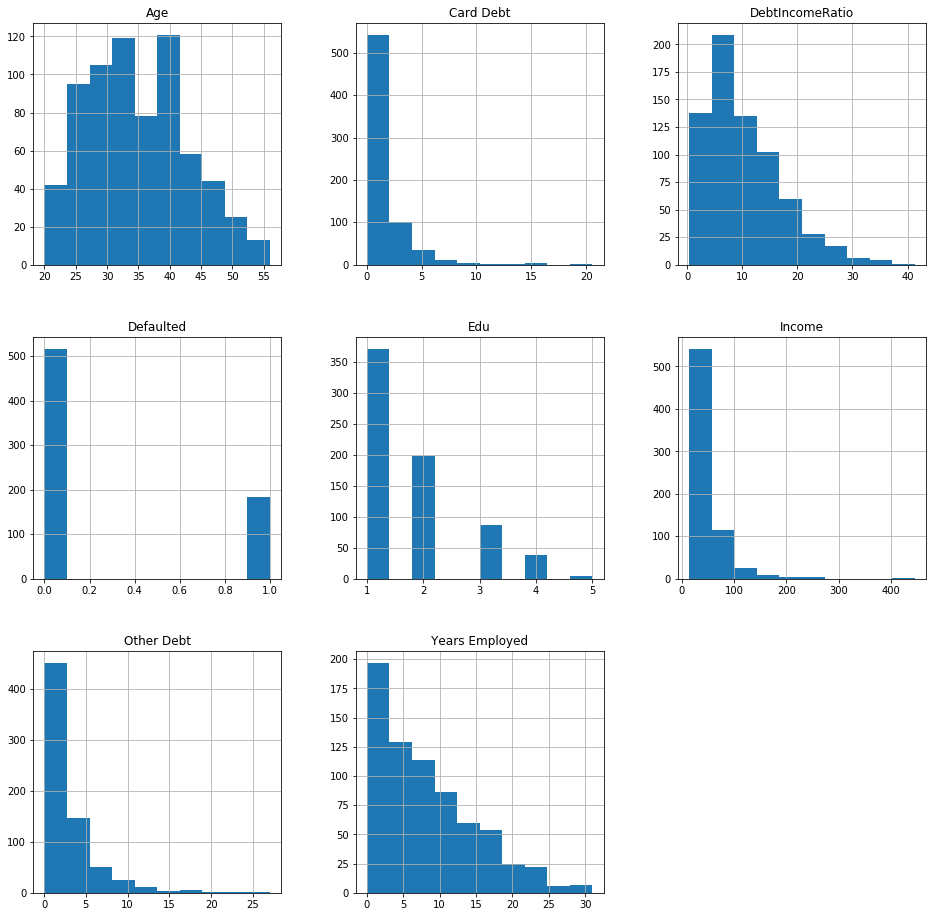

In [8]:
df.hist(figsize=(16,16));

In [9]:
df.corr()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Age,1.000000,0.022325,0.536497,0.478710,0.295214,0.340213,-0.137657,0.016398
Edu,0.022325,1.000000,-0.153621,0.235190,0.088277,0.165458,0.114676,0.008838
Years Employed,0.536497,-0.153621,1.000000,0.619681,0.403698,0.406089,-0.282978,-0.031182
Income,0.478710,0.235190,0.619681,1.000000,0.570196,0.610663,-0.070970,-0.026777
Card Debt,0.295214,0.088277,0.403698,0.570196,1.000000,0.633108,0.244734,0.501772
Other Debt,0.340213,0.165458,0.406089,0.610663,0.633108,1.000000,0.145716,0.584867
Defaulted,-0.137657,0.114676,-0.282978,-0.070970,0.244734,0.145716,1.000000,0.389575
DebtIncomeRatio,0.016398,0.008838,-0.031182,-0.026777,0.501772,0.584867,0.389575,1.000000


In [10]:
df.columns

Index(['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'Defaulted', 'Address', 'DebtIncomeRatio'],
      dtype='object')

In [11]:
# X,Y form df and train, test split
# Also drop Address categorical var

X = df.drop(columns=['Defaulted', 'Address']).values.astype(np.float)
y = df.Defaulted.values.astype(np.float)

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (560, 7) (560,)
Test set: (140, 7) (140,)


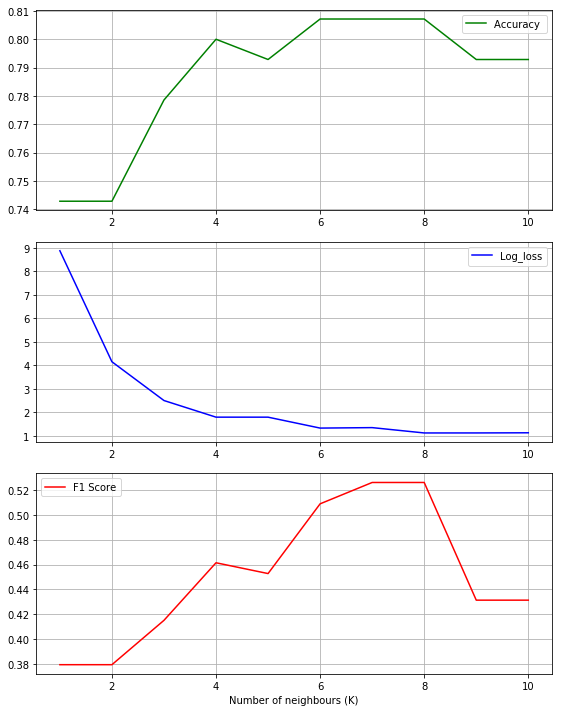

In [12]:
#KNN
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)
Ks = 11
weight = ['distance', 'uniform']
mean_acc = np.zeros((Ks-1))
logloss = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
f1_score = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors=n, weights=weight[0]).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
    
    logloss[n-1] = metrics.log_loss(y_test, neigh.predict_proba(X_test))
    
    f1_score[n-1] = metrics.f1_score(y_test, yhat, pos_label=1, average='binary')
    
    ConfustionMx.append(confusion_matrix(y_test, yhat))
    
fig = plt.figure(figsize=(8,10))
plt.subplot(3,1,1)
plt.plot(range(1,Ks),mean_acc,'g', label = 'Accuracy ');
plt.legend()
plt.grid(b=True, axis='both')

plt.subplot(3,1,2)
plt.plot(range(1,Ks),logloss,'b', label = 'Log_loss');
plt.legend()
plt.grid(b=True, axis='both')

plt.subplot(3,1,3)
plt.plot(range(1,Ks), f1_score,'r', label = 'F1 Score');
plt.legend(loc = 'upper left')
plt.xlabel('Number of neighbours (K)')
plt.grid(b=True, axis='both')
plt.tight_layout()

In [13]:
print ("The best accuracy was: {0:.3f} with k={k}".format(mean_acc.max(), k=mean_acc.argmax()+1))
print ("The best log_loss was: {0:.3f} with k={k}".format(logloss.min(), k=logloss.argmin()+1))
print ("The best f1_score was: {0:.3f} with k={k}".format(f1_score.max(), k=f1_score.argmax()+1))

The best accuracy was: 0.807 with k=6
The best log_loss was: 1.130 with k=8
The best f1_score was: 0.526 with k=7


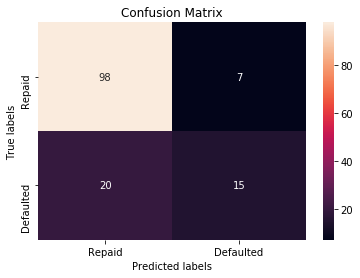

In [14]:
ax = plt.subplot()
sns.heatmap(ConfustionMx[7], annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Repaid', 'Defaulted']); ax.yaxis.set_ticklabels(['Repaid', 'Defaulted']);

Using weigts='distance' the accuracy is sligty lower but LogLoss is higher and the model
regognize TN and FN far better (15 vs. 11, 20 vs. 24), which is the point of interest in this task.

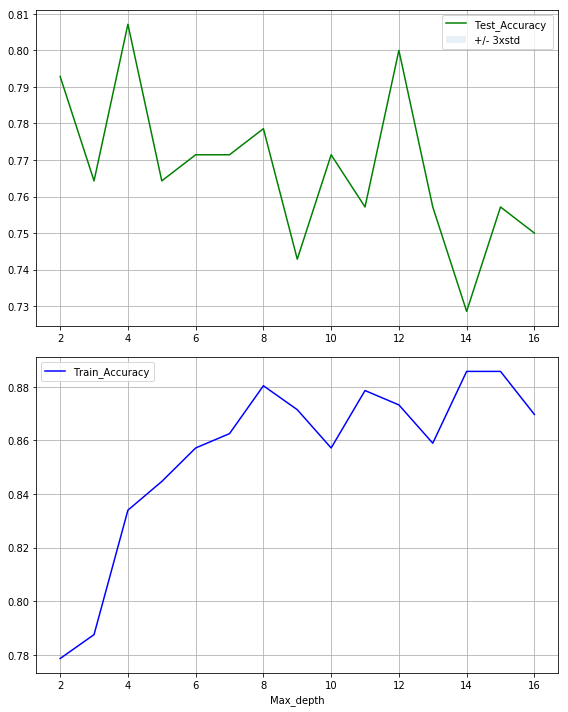

In [15]:
#Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

min_depth = 2
max_depth = 16
N = max_depth-min_depth+1
depth = list(range(min_depth,max_depth+1))
mean_acc = np.zeros(N)
train_acc = np.zeros(N)
std_acc = np.zeros(N)
ConfustionMx = [];
for n in range(N):
    
    #Train Model and Predict  
    rfc = RandomForestClassifier(n_estimators=10,
                                max_depth=depth[n],
                                min_samples_split = 0.02,
                                min_samples_leaf = 0.01,
                                max_features='auto')
    rfc.fit(X_train, y_train)
    yhat = rfc.predict(X_test)
    mean_acc[n] = metrics.accuracy_score(y_test, yhat)
    
    yhat_train = rfc.predict(X_train)
    train_acc[n] = metrics.accuracy_score(y_train, yhat_train)
    
    ConfustionMx.append(confusion_matrix(y_test, yhat))
    
fig = plt.figure(figsize=(8,10))
plt.subplot(2,1,1)
plt.plot(range(min_depth,max_depth+1),mean_acc,'g', label = 'Accuracy');
plt.fill_between(range(min_depth,max_depth+1),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Test_Accuracy ', '+/- 3xstd'))
plt.grid(b=True, axis='both')

plt.subplot(2,1,2)
plt.plot(range(min_depth,max_depth+1),train_acc,'b', label = 'Train_Accuracy');
plt.legend()

plt.xlabel('Max_depth')
plt.grid(b=True, axis='both')
plt.tight_layout()

In [16]:
mean_acc.argmax()

2

In [17]:
print ("The best accuracy was: {0:.3f} with depth: {depth}".format(mean_acc.max(), depth=depth[mean_acc.argmax()]))

The best accuracy was: 0.807 with depth: 4


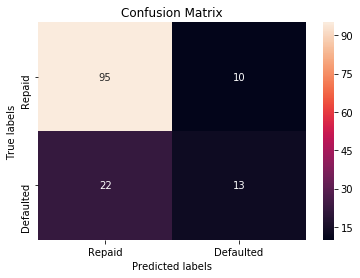

In [18]:
ax = plt.subplot()
sns.heatmap(ConfustionMx[4], annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Repaid', 'Defaulted']); ax.yaxis.set_ticklabels(['Repaid', 'Defaulted']);

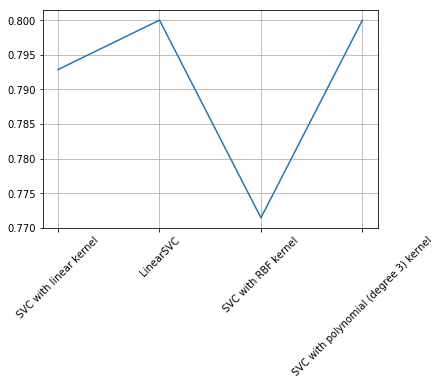

In [19]:
#Support Vector Machine

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

C = 1.0  # SVM regularization parameter
ConfustionMx = np.zeros((1,2,2))
accuracy = np.array([])

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=10000),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))

for clf in models:
    clf.fit(X_train, y_train)
    y_hat = clf.predict(X_test)
    accuracy = np.append(accuracy, metrics.accuracy_score(y_test, y_hat))
    ConfustionMx = np.append(ConfustionMx, confusion_matrix(y_test, yhat).reshape(1,2,2), axis=0)

# title for the plots
x_labels = ('SVC with linear kernel',
          'LinearSVC',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
plt.plot(x_labels, accuracy, label = 'Accuracy');
plt.xticks(rotation=45);
plt.grid(b=True, axis='both')

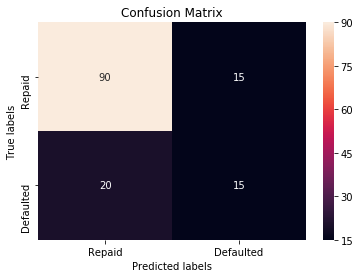

In [20]:
ax = plt.subplot()
sns.heatmap(ConfustionMx[accuracy.argmax()], annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Repaid', 'Defaulted']); ax.yaxis.set_ticklabels(['Repaid', 'Defaulted']);

In [21]:
print ("The best accuracy was: {0:.3f} with {lab}".format(accuracy.max(), lab=x_labels[accuracy.argmax()]))

The best accuracy was: 0.800 with LinearSVC


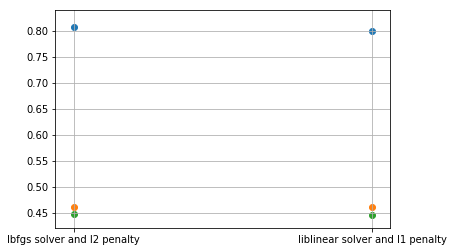

In [22]:
#Logistic Regression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train)
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

C = 10 # LR inverse of regularization strength
ConfustionMx = np.empty((1,2,2))
accuracy = np.array([])
f1_score = np.array([])
logloss = np.array([])

models = (LogisticRegressionCV(Cs=C, fit_intercept=True, solver='lbfgs', penalty='l2', cv=5),
          LogisticRegressionCV(Cs=C, fit_intercept=True, solver='liblinear', penalty='l1', cv=5))

for lr in models:
    lr.fit(X_train, y_train)
    y_hat = lr.predict(X_test)
    accuracy = np.append(accuracy, metrics.accuracy_score(y_test, y_hat))
    logloss = np.append(logloss, metrics.log_loss(y_test, lr.predict_proba(X_test))) 
    f1_score = np.append(f1_score, metrics.f1_score(y_test, yhat, pos_label=1, average='binary'))
    ConfustionMx = np.append(ConfustionMx, confusion_matrix(y_test, yhat).reshape(1,2,2), axis=0)

ConfustionMx = ConfustionMx[1:,:,:]
# title for the plots
x_labels = ['lbfgs solver and l2 penalty', 'liblinear solver and l1 penalty']

# Set-up 2x2 grid for plotting.
plt.scatter(x_labels, accuracy, label = 'Accuracy');
plt.scatter(x_labels, f1_score, label = 'f1_score'); 
plt.scatter(x_labels, logloss, label = 'logloss');
plt.grid(b=True, axis='both')
plt.xticks(rotation=0);

In [23]:
print ("The best accuracy was: {0:.3f} with {lab}".format(accuracy.max(), lab=x_labels[accuracy.argmax()]))
print ("The best log_loss was: {0:.3f} with {lab}".format(logloss.min(), lab=x_labels[logloss.argmin()]))
print ("The best F1_score was: {0:.3f} with {lab}".format(f1_score.max(), lab=x_labels[f1_score.argmax()]))

The best accuracy was: 0.807 with lbfgs solver and l2 penalty
The best log_loss was: 0.445 with liblinear solver and l1 penalty
The best F1_score was: 0.462 with lbfgs solver and l2 penalty


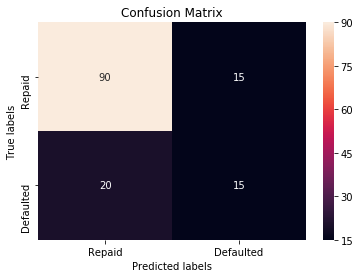

In [24]:
ax = plt.subplot()
sns.heatmap(ConfustionMx[accuracy.argmax()], annot=True, ax = ax, fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Repaid', 'Defaulted']); ax.yaxis.set_ticklabels(['Repaid', 'Defaulted']);